In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = yf.download('AAPL','2001-01-02', '2020-10-31')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.to_csv(r'Stocks_dataset.csv')

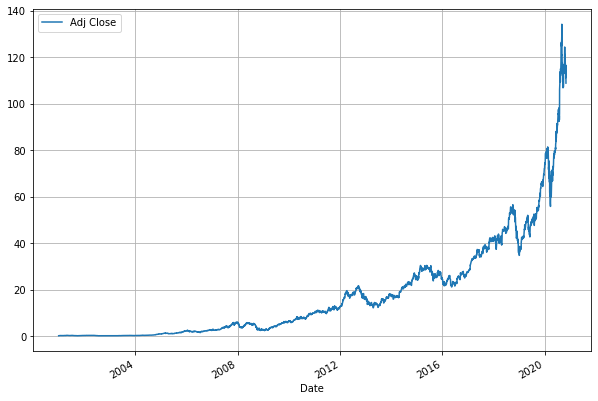

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-26,114.010002,116.550003,112.879997,115.050003,115.050003,111850700
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.599998,92276800
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.199997,143937800
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.320000,146129200
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.860001,190272600


In [8]:
df['Adj Close'].plot(figsize=(10,7))
plt.legend()
plt.grid()
plt.show()
df.tail()

In [13]:
# Calculate the daily percentage change, mean and sigma
df['daily_pct_change'] = df['Adj Close'].pct_change()
mu = df['daily_pct_change'].iloc[:-252].mean()
sigma = df['daily_pct_change'].iloc[:-252].std()

# Creating the random walk simulation of the probable price path
simulation = {}
simulation['Actual'] = list(df['Adj Close'].iloc[-252:].values)

for sim in range(1,5): # Taking 5 paths
    simulation["Simulation_"+str(sim)] = [df['Adj Close'].iloc[-252]]
    for days in range(251):
        next_day = simulation["Simulation_"+str(sim)][-1]*np.exp((mu-(sigma**2/2))+sigma*np.random.normal())
        simulation["Simulation_"+str(sim)].append(next_day)

Text(0, 0.5, 'Price')

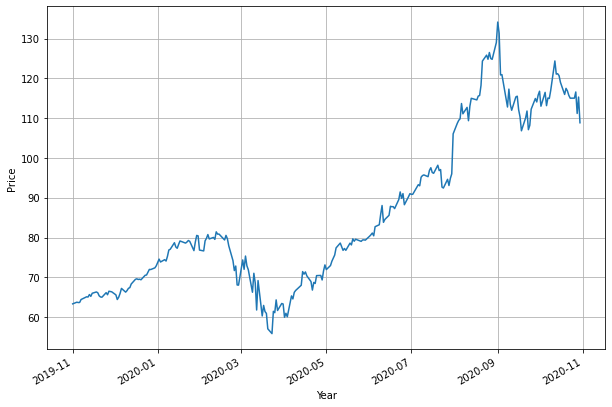

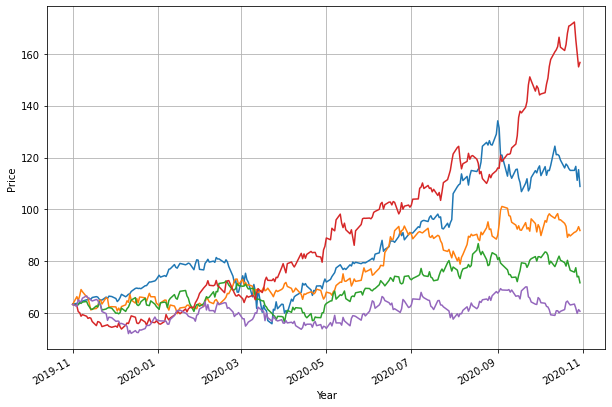

In [14]:
# Plotting the actual Adjusted Close price of General Motors
df['Adj Close'][-252:].plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')

# Plotting the simulation of random walk

simulation=pd.DataFrame(simulation)
simulation.index=df[-252:].index
simulation.plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')